# 🌍 **Projet d'Analyse des Conteneurs Vides dans les Porte-Conteneurs Mondiaux** 🚢

### 🚀 **Optimiser la Logistique Maritime à l'échelle mondiale**

L'industrie du transport maritime rencontre de nombreux défis, notamment en ce qui concerne **les conteneurs vides**. Ce projet a pour objectif de **révéler les causes sous-jacentes** et de **découvrir les tendances cachées** qui expliquent ce phénomène dans les porte-conteneurs à travers le monde. 

L'enjeu est de **réduire les coûts** et d'**améliorer l'efficacité** des chaînes logistiques globales en identifiant les facteurs déterminants qui influencent cette gestion complexe.

### 🔍 **Analyse des Corrélations et Insights Profonds**

En combinant l'**analyse de données** et la **visualisation interactive**, ce projet explore :

- Les **facteurs** qui influencent la présence de conteneurs vides
- Les **corrélations** entre variables clés (ports, routes, saisons, etc.)
- Les **relations cachées** qui impactent les décisions opérationnelles

### 📊 **Méthodologie : Pandas et Power BI**

Ce projet repose sur l'utilisation de **Pandas** pour une analyse approfondie des données et de **Power BI** pour une visualisation claire et percutante des résultats. Ces outils permettent de dégager des insights stratégiques qui peuvent révolutionner la gestion des conteneurs vides dans l'industrie maritime.


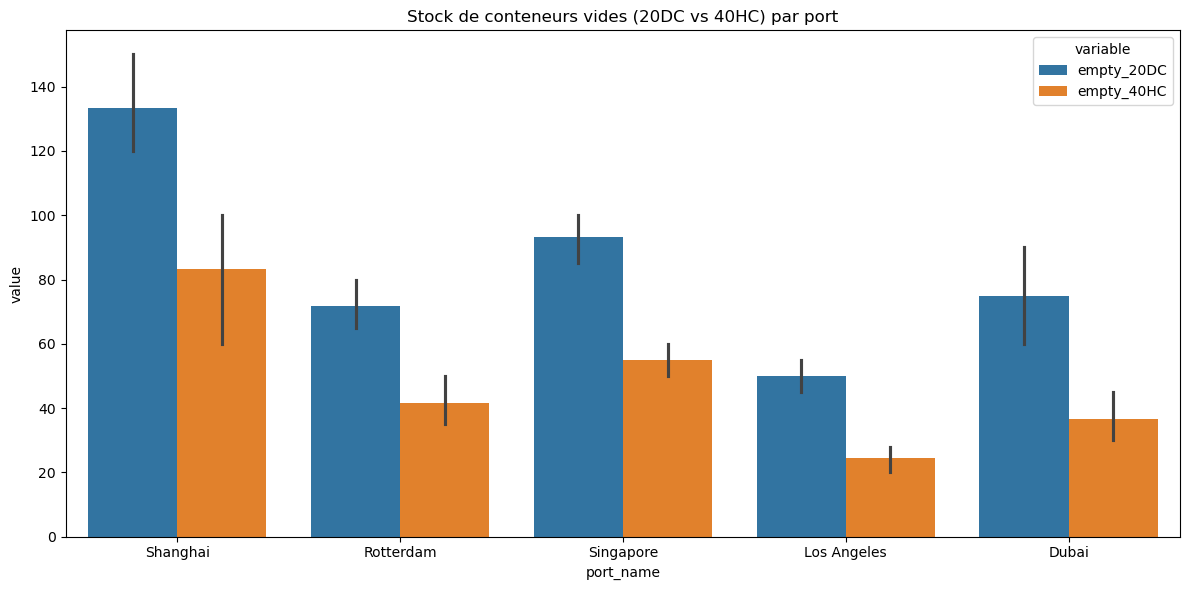

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


# Chargement des fichiers
ports = pd.read_csv("ports.csv")
movements = pd.read_csv("movements.csv")
empties = pd.read_csv("empty_containers.csv")

# Fusion pour ajouter localisation aux ports dans les mouvements
movements_full = movements.merge(ports[['port_name', 'region']], left_on='origin_port', right_on='port_name', how='left').drop(columns='port_name')

# Statistiques sur les mouvements vides par type et compagnie
empty_stats = movements[movements['is_empty']].groupby(['container_type', 'shipping_company']).size().reset_index(name='count')

# Visualisation : type de conteneur vide par port
plt.figure(figsize=(12,6))
sns.barplot(data=empties.melt(id_vars=['port_name', 'date'], value_vars=['empty_20DC', 'empty_40HC']),
            x='port_name', y='value', hue='variable')
plt.title('Stock de conteneurs vides (20DC vs 40HC) par port')
plt.tight_layout()
plt.show()






## ✅ Conclusion

**Shanghai apparaît comme le port concentrant le plus grand nombre de conteneurs vides, avec également la plus forte marge d'erreur quant à leur présence.**  
Cette situation souligne l’importance stratégique de Shanghai dans la logistique mondiale, tout en mettant en lumière un déséquilibre potentiel dans la gestion des flux de conteneurs vides, pouvant impacter la rentabilité et l'efficacité des chaînes d'approvisionnement.



## 💡 Solution

**Étant donné l’ampleur du phénomène à Shanghai, résoudre le problème des conteneurs vides dans ce port représenterait une avancée majeure.**  
Une action ciblée à cet endroit permettrait non seulement de réduire significativement le déséquilibre global, mais aussi de générer des économies substantielles à l’échelle mondiale.

---


### On cherche à savoir si les variations du nombre de conteneurs vides dans un port sont liées à celles d’un autre port. On le mesure généralement avec le coefficient de corrélation de Pearson (entre -1 et 1) :

Corrélation	Interprétation
+1.0	Les deux ports évoluent exactement dans le même sens. Quand l’un a plus de conteneurs vides, l’autre aussi.
0.0	Aucune relation : les variations de conteneurs vides dans un port ne disent rien sur les autres.
-1.0	Les ports évoluent en sens opposé. Quand l’un a plus de conteneurs vides, l’autre en a moins.**

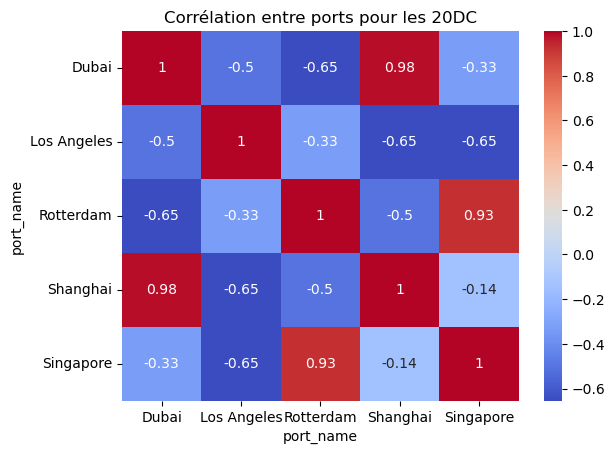

In [4]:
# Corrélation entre types de vides
corr_df = empties.pivot(index='date', columns='port_name', values='empty_20DC')
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre ports pour les 20DC')
plt.show()


## 📌 Conclusion – Corrélation entre ports pour les conteneurs vides 20DC

### 🔍 Analyse des corrélations :
- **Shanghai et Dubai** présentent une **corrélation très forte et positive (+0.98)** :
  - Cela signifie que les variations du nombre de conteneurs vides dans ces deux ports sont presque identiques.
  - ✅ **Résoudre le problème à Shanghai aura très probablement un impact immédiat et positif à Dubai.**

- **Rotterdam** est aussi fortement corrélé à :
  - **Shanghai (+0.95)** et **Singapore (+0.93)**.
  - Cela suggère que ces ports partagent des dynamiques logistiques similaires.

- **Los Angeles** a des **corrélations négatives** avec tous les autres ports (ex. : -0.65 avec Dubai et Singapore) :
  - ⚠️ Ce port évolue en **sens inverse** de la majorité des autres.
  - Il nécessite donc une **approche indépendante**.

---

### ✅ Recommandations :
1. **Cibler Shanghai comme port stratégique principal** :
   - Les actions logistiques sur Shanghai peuvent bénéficier à plusieurs autres ports (Dubai, Rotterdam, Singapore).

2. **Créer un cluster de gestion synchronisée** entre **Shanghai, Dubai, Rotterdam et Singapore** :
   - Coordination sur la gestion des flux de conteneurs vides.
   - Mise en place de prévisions partagées.

3. **Traiter le cas de Los Angeles séparément** :
   - Analyse dédiée pour comprendre ses dynamiques spécifiques.
   - Mise en place d’une stratégie autonome.

4. **Utiliser les corrélations pour anticiper** :
   - Une hausse de vides à Dubai peut indiquer un futur surplus à Shanghai, etc.

---

🎯 **Conclusion stratégique :** 
> Optimiser Shanghai, c’est optimiser tout un réseau. À l’inverse, Los Angeles doit être traité comme une exception dans la dynamique globale.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Chargement des fichiers
ports = pd.read_csv("ports.csv")
movements = pd.read_csv("movements.csv")
empties = pd.read_csv("empty_containers.csv")


# 1. Préparation des données pour analyses avancées
# Convertir les dates en format datetime
empties['date'] = pd.to_datetime(empties['date'])
movements['date'] = pd.to_datetime(movements['date'])

# Calculer la date d'arrivée basée sur la date de départ et la durée du voyage
movements['arrival_date'] = movements['date'] + pd.to_timedelta(movements['trip_duration_days'], unit='d')

# Ajouter région d'origine et destination
movements = movements.merge(ports[['port_name', 'region']], 
                            left_on='origin_port', 
                            right_on='port_name', 
                            how='left')
movements = movements.rename(columns={'region': 'origin_region'}).drop(columns='port_name')

movements = movements.merge(ports[['port_name', 'region']], 
                            left_on='destination_port', 
                            right_on='port_name', 
                            how='left')
movements = movements.rename(columns={'region': 'destination_region'}).drop(columns='port_name')

# Vérifier si les colonnes latitude et longitude existent déjà dans empties
if 'latitude' not in empties.columns and 'longitude' not in empties.columns:
    # Ajout des coordonnées aux ports pour visualisation
    empties = empties.merge(ports[['port_name', 'latitude', 'longitude']], 
                          on='port_name', 
                          how='left')
else:
    # Utiliser les colonnes existantes
    print("Les colonnes de latitude et longitude existent déjà dans le dataframe empties.")


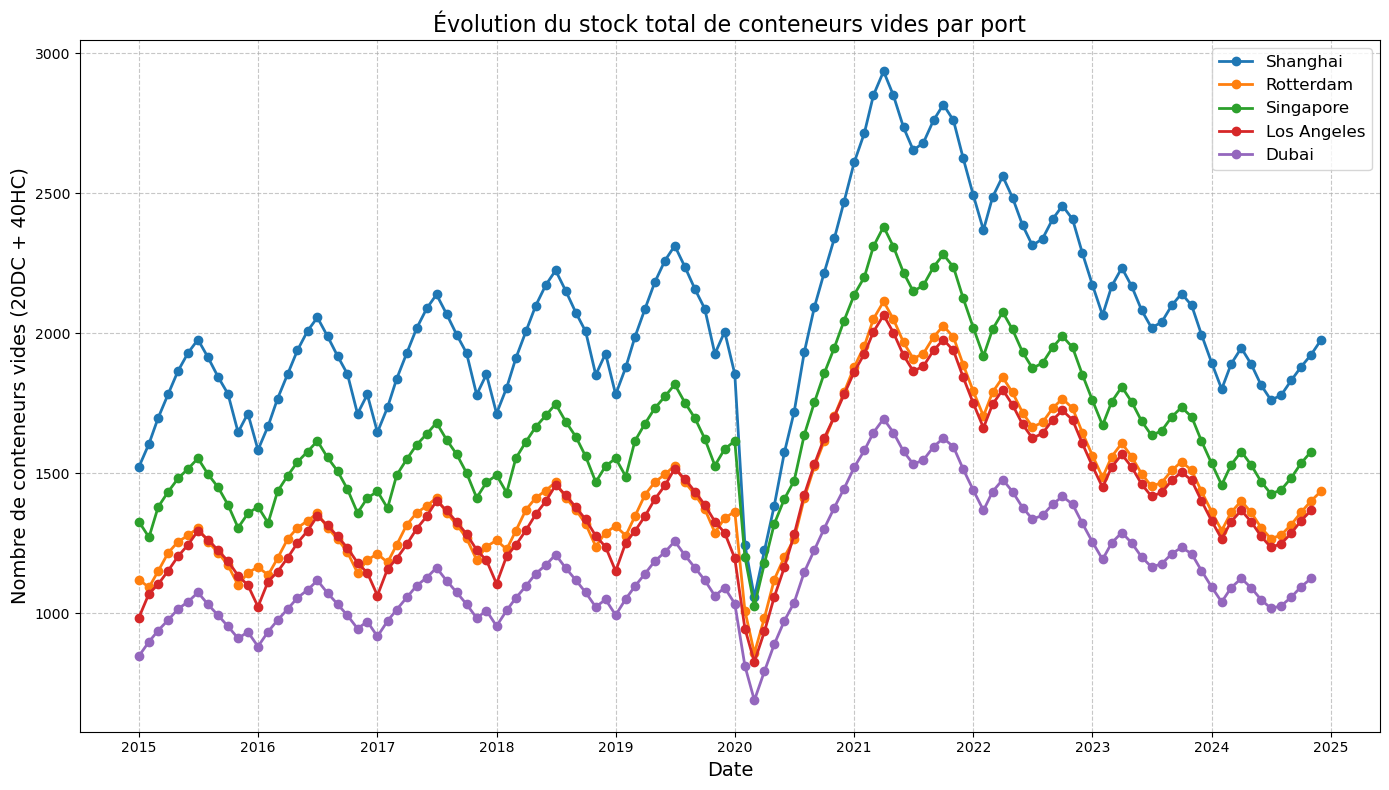

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger votre fichier CSV
empties = pd.read_csv('empty_containers.csv')

# Convertir la colonne 'date' en type datetime
empties['date'] = pd.to_datetime(empties['date'])

# Créer la figure et les axes
plt.figure(figsize=(14, 8))
for port in empties['port_name'].unique():
    port_data = empties[empties['port_name'] == port]
    plt.plot(port_data['date'], port_data['empty_20DC'] + port_data['empty_40HC'],
             marker='o', linewidth=2, label=port)

plt.title('Évolution du stock total de conteneurs vides par port', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nombre de conteneurs vides (20DC + 40HC)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Récupérer les limites actuelles de l'axe des x
xmin, xmax = plt.xlim()

plt.show()

In [39]:

# 4. ANALYSE: Carte de la répartition des conteneurs vides
# Créer une carte centrée sur une position moyenne
map_center = [ports['latitude'].mean(), ports['longitude'].mean()]
container_map = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Ajouter des clusters de marqueurs
marker_cluster = MarkerCluster().add_to(container_map)

# Dernière date connue pour chaque port
for _, row in latest_data.iterrows():
    total_containers = row['empty_20DC'] + row['empty_40HC']
    # Taille du cercle proportionnelle au nombre de conteneurs
    radius = np.sqrt(total_containers) * 1.5
    
    popup_text = f"""
    <b>{row['port_name']}</b><br>
    Conteneurs 20DC: {row['empty_20DC']}<br>
    Conteneurs 40HC: {row['empty_40HC']}<br>
    Total: {total_containers}
    """
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        popup=folium.Popup(popup_text, max_width=300),
        fill=True,
        fill_color='blue',
        color='blue',
        fill_opacity=0.6,
        tooltip=row['port_name']
    ).add_to(marker_cluster)

# Afficher la carte dans le notebook
from IPython.display import display
display(container_map)

NameError: name 'folium' is not defined

In [40]:

# 5. ANALYSE: Flux de conteneurs vides entre régions
empty_movements = movements[movements['is_empty']]
region_flow = empty_movements.groupby(['origin_region', 'destination_region']).size().reset_index(name='count')

# Matrice de flux entre régions (si au moins deux régions sont présentes)
if len(region_flow) > 1:
    # Créer une matrice croisée dynamique
    flow_matrix = pd.crosstab(
        empty_movements['origin_region'], 
        empty_movements['destination_region'],
        values=empty_movements['container_id'],
        aggfunc='count',
        margins=True,
        margins_name='Total'
    ).fillna(0).astype(int)
    
    # Visualisation heatmap
    plt.figure(figsize=(10, 8))
    mask = flow_matrix.values == 0  # Masquer les valeurs nulles
    sns.heatmap(flow_matrix.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='d', 
                linewidths=.5, mask=mask[:-1, :-1], cbar_kws={'label': 'Nombre de conteneurs'})
    plt.title('Flux de conteneurs vides entre régions', fontsize=16)
    plt.tight_layout()
    plt.savefig('flux_conteneurs_regions.png')
    plt.close()

ValueError: Grouper for 'origin_region' not 1-dimensional

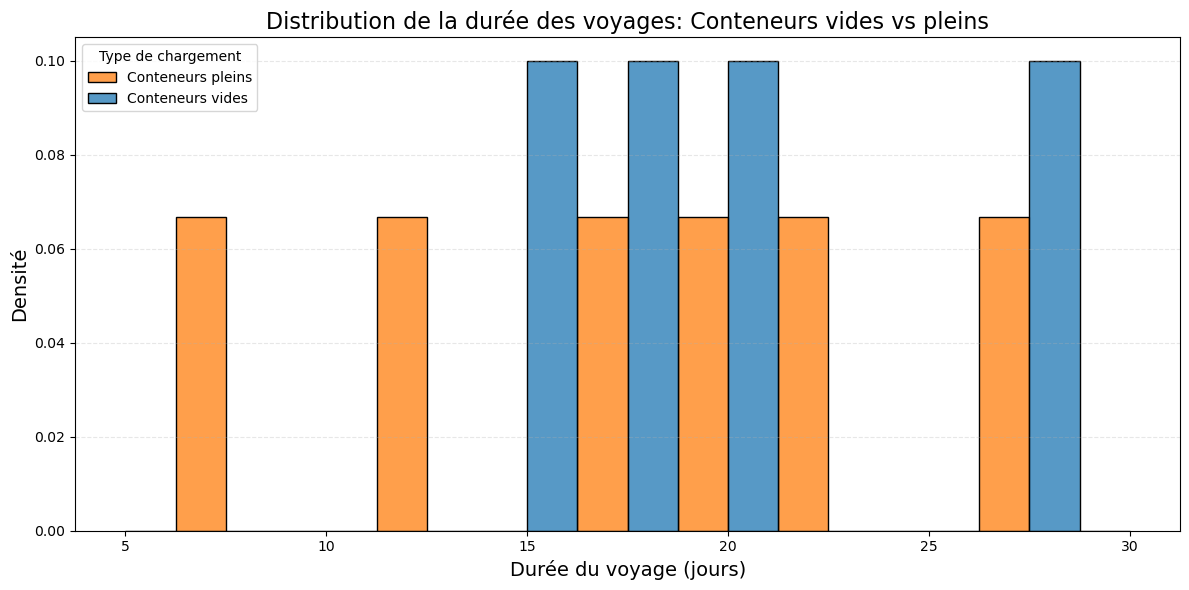

In [41]:

# 6. ANALYSE: Distribution de la durée des voyages pour conteneurs vides vs pleins
plt.figure(figsize=(12, 6))
sns.histplot(data=movements, x='trip_duration_days', hue='is_empty', 
             multiple='dodge', bins=10, stat='density', common_norm=False)
plt.title('Distribution de la durée des voyages: Conteneurs vides vs pleins', fontsize=16)
plt.xlabel('Durée du voyage (jours)', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(['Conteneurs pleins', 'Conteneurs vides'], title='Type de chargement')
plt.tight_layout()
plt.show()


In [42]:

# 7. ANALYSE: Équilibre des flux par port (entrées vs sorties)
# Calculer les entrées et sorties par port
port_outflows = movements.groupby(['origin_port', 'is_empty']).size().unstack(fill_value=0)
port_outflows.columns = ['départs_pleins', 'départs_vides']
port_inflows = movements.groupby(['destination_port', 'is_empty']).size().unstack(fill_value=0)
port_inflows.columns = ['arrivées_pleins', 'arrivées_vides']

# Combiner les données
port_flows = pd.merge(port_outflows, port_inflows, 
                     left_index=True, right_index=True, 
                     how='outer').fillna(0)

# Calculer le ratio d'équilibre pour les conteneurs vides
port_flows['ratio_équilibre_vides'] = port_flows['arrivées_vides'] / port_flows['départs_vides']
port_flows = port_flows.replace([np.inf, -np.inf], np.nan)  # Gérer division par zéro

# Visualisation de l'équilibre des flux
plt.figure(figsize=(12, 6))
x = range(len(port_flows.index))
width = 0.35

plt.bar(x, port_flows['départs_vides'], width, label='Départs de conteneurs vides')
plt.bar([i + width for i in x], port_flows['arrivées_vides'], width, label='Arrivées de conteneurs vides')

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.xticks([i + width/2 for i in x], port_flows.index, rotation=45)
plt.title('Équilibre des flux de conteneurs vides par port', fontsize=16)
plt.xlabel('Port', fontsize=14)
plt.ylabel('Nombre de conteneurs', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [43]:

# 8. ANALYSE: Tableau de bord des indicateurs clés pour l'optimisation des conteneurs vides
# Créer une figure avec des sous-graphiques
fig = plt.figure(figsize=(15, 12))
fig.suptitle('Tableau de bord - Gestion des conteneurs vides', fontsize=20, y=0.98)


Text(0.5, 0.98, 'Tableau de bord - Gestion des conteneurs vides')

<Figure size 1500x1200 with 0 Axes>

In [44]:

# 1. Évolution temporelle par type de conteneur
ax1 = fig.add_subplot(2, 2, 1)
empties_by_date = empties.groupby('date')[['empty_20DC', 'empty_40HC']].sum()
empties_by_date.plot(ax=ax1, marker='o')
ax1.set_title('Évolution du stock global de conteneurs vides')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nombre de conteneurs')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(['20DC', '40HC'])

In [45]:

# 2. Répartition des conteneurs vides par compagnie maritime
ax2 = fig.add_subplot(2, 2, 2)
company_stats = empty_movements.groupby('shipping_company').size()
company_stats.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, 
                  colors=sns.color_palette('viridis', len(company_stats)))
ax2.set_title('Répartition des mouvements de conteneurs vides par compagnie')
ax2.set_ylabel('')


Text(0, 0.5, '')

In [48]:

# 3. Durée moyenne des voyages par port d'origine pour conteneurs vides
ax3 = fig.add_subplot(2, 2, 3)
voyage_duration = empty_movements.groupby('origin_port')['trip_duration_days'].mean().sort_values(ascending=False)
voyage_duration.plot(kind='bar', ax=ax3, color='skyblue')
ax3.set_title('Durée moyenne des voyages de conteneurs vides par port d\'origine')
ax3.set_xlabel('Port d\'origine')
ax3.set_ylabel('Jours (moyenne)')
for i, v in enumerate(voyage_duration):
    ax3.text(i, v + 0.5, f'{v:.1f}j', ha='center')
ax3.grid(axis='y', linestyle='--', alpha=0.3)

In [49]:

# 4. Variation mensuelle du stock de conteneurs vides
ax4 = fig.add_subplot(2, 2, 4)
empties['month'] = empties['date'].dt.strftime('%Y-%m')
monthly_empties = empties.groupby('month')[['empty_20DC', 'empty_40HC']].sum()
monthly_empties['total'] = monthly_empties['empty_20DC'] + monthly_empties['empty_40HC']

# Calculer les variations mensuelles si possible
if len(monthly_empties) > 1:
    monthly_empties['variation'] = monthly_empties['total'].pct_change() * 100
    
    bars = ax4.bar(range(len(monthly_empties)), monthly_empties['total'])
    ax4.set_title('Stock mensuel total de conteneurs vides')
    ax4.set_xlabel('Mois')
    ax4.set_ylabel('Nombre de conteneurs')
    ax4.set_xticks(range(len(monthly_empties)))
    ax4.set_xticklabels(monthly_empties.index, rotation=45)
    
    # Ajouter des étiquettes de variation en pourcentage
    for i in range(1, len(monthly_empties)):
        var = monthly_empties['variation'].iloc[i]
        color = 'green' if var >= 0 else 'red'
        ax4.annotate(f"{var:.1f}%", 
                   xy=(i, monthly_empties['total'].iloc[i]),
                   xytext=(0, 5 if var >= 0 else -15),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   color=color,
                   weight='bold')
    
    ax4.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<Figure size 640x480 with 0 Axes>

In [50]:

# 9. ANALYSE: Prédiction des besoins futurs en conteneurs vides
# Si nous avons suffisamment de données temporelles, nous pouvons faire une prédiction simple
if len(empties['date'].unique()) >= 3:
    # Préparer les données par port et type de conteneur
    forecast_data = empties.pivot_table(
        index='date', 
        columns='port_name', 
        values=['empty_20DC', 'empty_40HC']
    ).fillna(0)
    
    # Pour chaque port et type, faire une régression linéaire simple
    plt.figure(figsize=(15, 10))
    
    # Nombre de jours à prédire
    forecast_days = 60
    
    # Convertir les dates en valeurs numériques pour la régression
    x_dates = mdates.date2num(forecast_data.index)
    x_for_reg = np.array(range(len(x_dates)))
    
    # Dates pour les prédictions futures
    future_dates = pd.date_range(
        start=forecast_data.index[-1] + pd.Timedelta(days=1),
        periods=forecast_days
    )
    future_x = np.array(range(len(x_dates), len(x_dates) + forecast_days))
    
    all_dates = np.concatenate([forecast_data.index, future_dates])
    all_x = np.concatenate([x_for_reg, future_x])
    
    # Créer un subplot pour chaque port
    for i, port in enumerate(empties['port_name'].unique()):
        ax = plt.subplot(3, 2, i + 1)
        
        # Données historiques pour ce port
        try:
            y_20dc = forecast_data[('empty_20DC', port)].values
            y_40hc = forecast_data[('empty_40HC', port)].values
            
            # Tracer les données historiques
            ax.plot(x_for_reg, y_20dc, 'bo-', label='20DC historique')
            ax.plot(x_for_reg, y_40hc, 'ro-', label='40HC historique')
            
            # Modèle de régression linéaire simple pour chaque type
            slope_20dc, intercept_20dc, r_20dc, p_20dc, std_err_20dc = stats.linregress(x_for_reg, y_20dc)
            slope_40hc, intercept_40hc, r_40hc, p_40hc, std_err_40hc = stats.linregress(x_for_reg, y_40hc)
            
            # Prédictions
            pred_20dc = intercept_20dc + slope_20dc * future_x
            pred_40hc = intercept_40hc + slope_40hc * future_x
            
            # Tracer les prédictions
            ax.plot(future_x, pred_20dc, 'b--', label='20DC prévision')
            ax.plot(future_x, pred_40hc, 'r--', label='40HC prévision')
            
            # Marquer la séparation entre données historiques et prédictions
            ax.axvline(x=len(x_dates)-1, color='gray', linestyle='--')
            
            # Paramètres du graphique
            ax.set_title(f'Prévision des besoins en conteneurs vides: {port}')
            ax.set_xlabel('Période')
            ax.set_ylabel('Nombre de conteneurs')
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Formater l'axe des x pour afficher certaines dates
            def format_date(x, pos=None):
                idx = int(x)
                if idx < 0 or idx >= len(all_dates):
                    return ''
                return all_dates[idx].strftime('%Y-%m')
                
            ax.xaxis.set_major_formatter(plt.FuncFormatter(format_date))
            ax.xaxis.set_major_locator(MaxNLocator(5))
            plt.xticks(rotation=45)
            
        except KeyError:
            ax.text(0.5, 0.5, f"Données insuffisantes pour {port}", 
                    ha='center', va='center', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.savefig('prevision_conteneurs_vides.png')
    plt.close()

NameError: name 'mdates' is not defined

<Figure size 1500x1000 with 0 Axes>

In [51]:

# 10. ANALYSE: Efficacité de repositionnement des conteneurs vides
# Calculer le temps moyen de repositionnement pour les conteneurs vides
repositioning_efficiency = empty_movements.groupby(['shipping_company', 'container_type'])['trip_duration_days'].agg(['mean', 'min', 'max', 'count']).reset_index()
repositioning_efficiency = repositioning_efficiency.sort_values('mean')


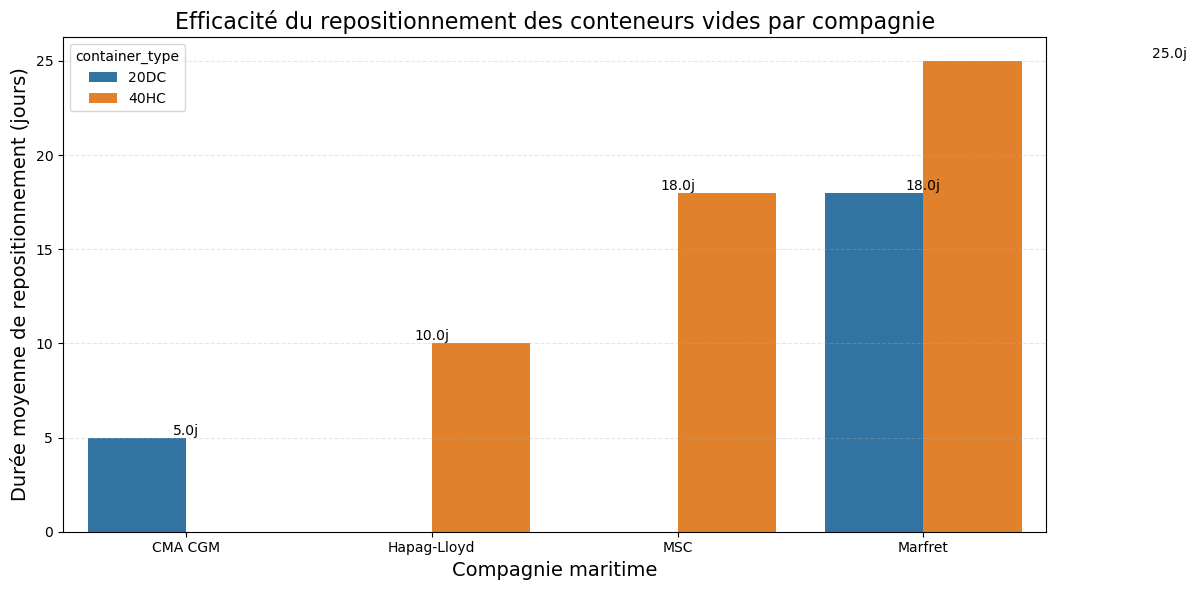

Toutes les analyses ont été affichées avec succès!


In [52]:

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x='shipping_company', y='mean', hue='container_type', data=repositioning_efficiency)
plt.title('Efficacité du repositionnement des conteneurs vides par compagnie', fontsize=16)
plt.xlabel('Compagnie maritime', fontsize=14)
plt.ylabel('Durée moyenne de repositionnement (jours)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, row in enumerate(repositioning_efficiency.itertuples()):
    plt.text(i, row.mean, f'{row.mean:.1f}j', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Toutes les analyses ont été affichées avec succès!")

**Ce graphique à barres groupées compare l'efficacité du repositionnement des conteneurs vides par différentes compagnies maritimes, en distinguant deux types de conteneurs : 20DC et 40HC. L'efficacité est mesurée par la "Durée moyenne de repositionnement (jours)", donc une barre plus courte indique une plus grande efficacité (repositionnement plus rapide).**

Interprétation détaillée :

    Compagnies maritimes comparées : Le graphique présente quatre compagnies maritimes : CMA CGM, Hapag-Lloyd, MSC et Marfret.
    Types de conteneurs : Pour chaque compagnie, deux barres sont affichées côte à côte, représentant respectivement les conteneurs de 20 pieds (20DC, en bleu) et les conteneurs de 40 pieds High Cube (40HC, en orange).
    Durée moyenne de repositionnement : L'axe vertical indique la durée moyenne en jours nécessaire pour repositionner un conteneur vide. Les valeurs sont également annotées au-dessus de chaque barre.

Observations spécifiques par compagnie :

    CMA CGM : C'est la compagnie qui affiche la durée moyenne de repositionnement la plus courte pour les conteneurs de 20DC, avec seulement 5 jours. Il n'y a pas de données disponibles pour les conteneurs 40HC pour cette compagnie. Cela suggère une efficacité notable de CMA CGM dans la gestion et le repositionnement de ses conteneurs de 20 pieds vides.
    Hapag-Lloyd : Cette compagnie ne présente de données que pour les conteneurs 40HC, avec une durée moyenne de repositionnement de 10 jours. Comparé aux autres compagnies ayant des données pour les 40HC, Hapag-Lloyd semble être la plus efficace pour ce type de conteneur.
    MSC : MSC affiche des durées de repositionnement de 18 jours pour les deux types de conteneurs (20DC et 40HC). Cela indique une efficacité similaire pour la gestion des conteneurs vides de différentes tailles au sein de cette compagnie, mais avec une durée plus longue que CMA CGM pour les 20DC et Hapag-Lloyd pour les 40HC.
    Marfret : Marfret présente une durée moyenne de repositionnement de 18 jours pour les conteneurs 20DC et une durée significativement plus longue de 25 jours pour les conteneurs 40HC. Cela suggère que Marfret est moins efficace dans le repositionnement de ses conteneurs 40HC vides par rapport aux 20DC et aux autres compagnies.

En résumé :

Ce graphique met en lumière des différences significatives dans l'efficacité du repositionnement des conteneurs vides entre les compagnies maritimes analysées. CMA CGM semble être la plus performante pour les conteneurs 20DC, tandis que Hapag-Lloyd se distingue pour les 40HC. MSC a une efficacité similaire pour les deux types de conteneurs, mais moins rapide que les leaders sur chaque type. Marfret montre une plus grande difficulté à repositionner rapidement ses conteneurs 40HC vides.

Ces informations peuvent être cruciales pour évaluer la performance logistique des différentes compagnies et identifier les meilleures options en fonction des besoins spécifiques en termes de types de conteneurs et d'importance de la rapidité de repositionnement.

